In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,NaN,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,NaN
2,8.0,NaN,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,NaN,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,NaN,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,NaN,122.0,70.0,27.0,NaN,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,NaN,30.0
766,NaN,NaN,NaN,0.0,NaN,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	148
float64		column 2	177
float64		column 3	145
float64		column 4	136
float64		column 5	181
float64		column 6	150
float64		column 7	149
float64		column 8	142


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,620.000000,591.000000,623.000000,632.000000,587.000000,618.000000,619.000000,626.000000
mean,3.956452,120.316413,68.982343,20.697785,82.194208,31.994013,0.470048,33.410543
std,3.364699,31.347420,19.567626,15.738416,116.299835,8.122048,0.337555,12.076257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.850000,0.244000,24.000000
50%,3.000000,116.000000,72.000000,23.000000,37.000000,32.350000,0.368000,29.000000
75%,6.000000,139.500000,80.000000,32.000000,131.000000,36.600000,0.613000,41.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

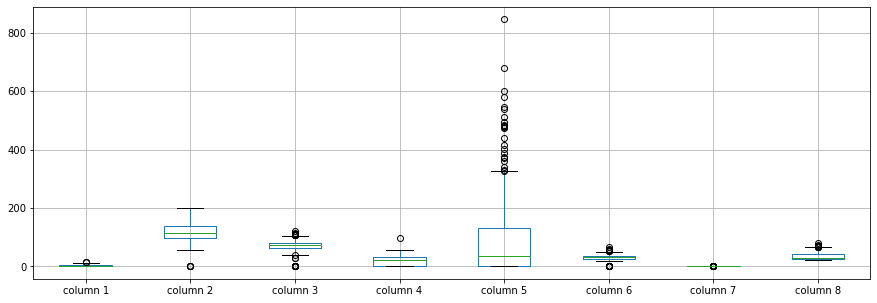

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.956452
column 2    120.316413
column 3     68.982343
column 4     20.697785
column 5     82.194208
column 6     31.994013
column 7      0.470048
column 8     33.410543
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.111361,0.144440,-0.060368,-0.069471,0.047846,-0.018130,0.515828
column 2,0.111361,1.000000,0.144703,0.052511,0.330950,0.239228,0.168678,0.268150
column 3,0.144440,0.144703,1.000000,0.222630,0.104417,0.302794,0.048442,0.222816
column 4,-0.060368,0.052511,0.222630,1.000000,0.446311,0.406821,0.182356,-0.122590
column 5,-0.069471,0.330950,0.104417,0.446311,1.000000,0.224083,0.095557,-0.038550
column 6,0.047846,0.239228,0.302794,0.406821,0.224083,1.000000,0.102784,0.019018
column 7,-0.018130,0.168678,0.048442,0.182356,0.095557,0.102784,1.000000,0.064538
column 8,0.515828,0.268150,0.222816,-0.122590,-0.038550,0.019018,0.064538,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+11,8+11+11,8+11+11+11,8+11+11+11+11,8+11+11+11+11+11,8+11+11+11+11,8+11+11+11,8+11+11,8+11,8], vae_layer = False, seed = 11)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 338.3104934692383
Epoch: 1 , loss: 333.93274974823
Epoch: 2 , loss: 336.63293011983234
Epoch: 3 , loss: 336.3709290822347
Epoch: 4 , loss: 336.0777123769124
Epoch: 5 , loss: 335.750475247701
Epoch: 6 , loss: 335.7415418624878
Epoch: 7 , loss: 337.29996077219647
Epoch: 8 , loss: 334.7144368489583
Epoch: 9 , loss: 334.547155380249
Epoch: 10 , loss: 334.83691533406574
Epoch: 11 , loss: 333.02062797546387
Epoch: 12 , loss: 329.3013744354248
Epoch: 13 , loss: 326.3528340657552
Epoch: 14 , loss: 319.5676072438558
Epoch: 15 , loss: 308.9356168111165
Epoch: 16 , loss: 303.3777844111125
Epoch: 17 , loss: 296.505158106486
Epoch: 18 , loss: 291.62932840983075
Epoch: 19 , loss: 285.31035200754803
Epoch: 20 , loss: 279.2533423105876
Epoch: 21 , loss: 285.6265459060669
Epoch: 22 , loss: 278.1236000061035
Epoch: 23 , loss: 276.87152258555096
Epoch: 24 , loss: 274.38704617818195
Epoch: 25 , loss: 274.7381258010864
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,-34.765855,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-30.793669
2,0.000000,-182.747998,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,-93.794896,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,-42.894256,0.00000,0.000000
...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
764,-1.708212,0.000000,0.000000,0.000000,0.268653,0.000000,0.00000,0.000000
765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.12934,0.000000
766,-0.721636,-125.733542,-59.730764,0.000000,0.257864,0.000000,0.00000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2684.4195842101935, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.4647077210742941

In [18]:
new_df.iloc[66,:]

column 1      0.00000
column 2    109.00000
column 3     88.00000
column 4     30.00000
column 5      0.00000
column 6     32.50000
column 7      0.14229
column 8     38.00000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.000000,72.000000,0.234145,0.000000,33.600000,0.62700,50.000000
1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.35100,0.206331
2,8.000000,0.252002,64.000000,0.000000,0.000000,23.300000,0.67200,32.000000
3,1.000000,89.000000,66.000000,23.000000,0.205104,28.100000,0.16700,21.000000
4,0.000000,137.000000,40.000000,35.000000,168.000000,0.205744,2.28800,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,101.000000,76.000000,48.000000,180.000000,32.900000,0.17100,63.000000
764,0.291788,122.000000,70.000000,27.000000,0.268653,36.800000,0.34000,27.000000
765,5.000000,121.000000,72.000000,23.000000,112.000000,26.200000,0.37434,30.000000
766,0.278364,0.266458,0.269236,0.000000,0.257864,30.100000,0.34900,47.000000


In [21]:
imputations[-1].to_excel("PID_C_20.xlsx", index=False, header=False)